# Homework 4

**Joseph Livesey**

**October 28, 2021**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal

import warnings
warnings.filterwarnings('ignore')

## Problem 0

In [2]:
t = np.linspace(0, 100*np.pi, np.int(1e5))

N = 10 + np.sin(t)

bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

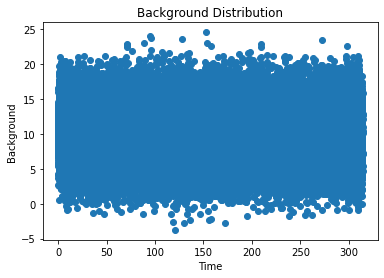

In [3]:
fig, ax = plt.subplots(1, 1)
ax.scatter(t, bkgd)
ax.set_title('Background Distribution')
ax.set_xlabel('Time')
ax.set_ylabel('Background');

## Problem 1
### Part (a)

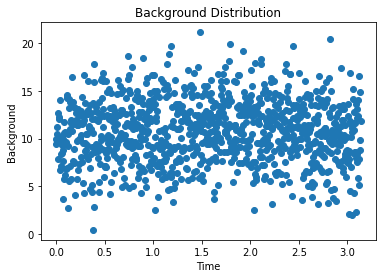

In [4]:
fig, ax = plt.subplots(1, 1)
ax.scatter(t[0:999], bkgd[0:999])
ax.set_title('Background Distribution')
ax.set_xlabel('Time')
ax.set_ylabel('Background');

### Part (b)

In [5]:
def slice_plot(starting_time, time_interval):
    start_index = starting_time - 1
    end_index = start_index + time_interval
    
    fig, ax = plt.subplots(1, 1)
    ax.scatter(t[start_index:end_index], bkgd[start_index:end_index])
    ax.set_title('Background Distribution')
    ax.set_xlabel('Time')
    ax.set_ylabel('Background');

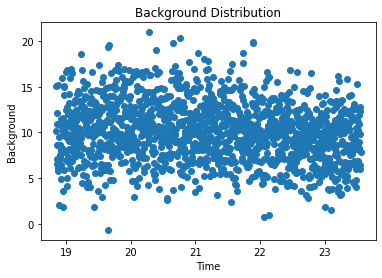

In [6]:
slice_plot(6000, 1500)

The function `slice_plot` here will return such a plot for any range of times defined by a starting time and an interval.

### Part (c)

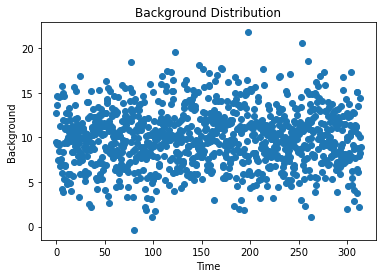

In [7]:
t_subset = []
bkgd_subset = []

for i in range(len(t)):
    if i % 100 == 0:
        t_subset.append(t[i])
        bkgd_subset.append(bkgd[i])

fig, ax = plt.subplots(1, 1)
ax.scatter(t_subset, bkgd_subset)
ax.set_title('Background Distribution')
ax.set_xlabel('Time')
ax.set_ylabel('Background');

## Problem 2
### Part (a)

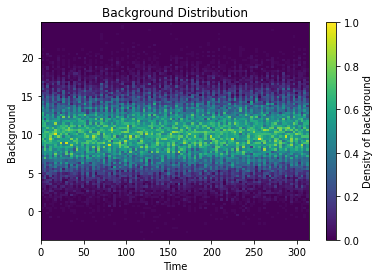

In [8]:
fig, ax = plt.subplots(1, 1)
ax.hist2d(t, bkgd, [100, 100])
fig.colorbar(plt.cm.ScalarMappable(), ax=ax, label='Density of background')
ax.set_title('Background Distribution')
ax.set_xlabel('Time')
ax.set_ylabel('Background');

### Part (b)

In the above histogram, the brighter colors indicate regions of high density in the space formed by the time indices and the corresponding background distribution. That is, the more colorful region is where it is more likely the background produced a given measured signal.

## Problem 3
### Part (a)

In [11]:
xx = np.linspace(0, 100, 1000)

def periodic_signal(xx):
    sig = []
    for x in xx:
        f = x % (2*np.pi)
        sig.append(f)
    return sig

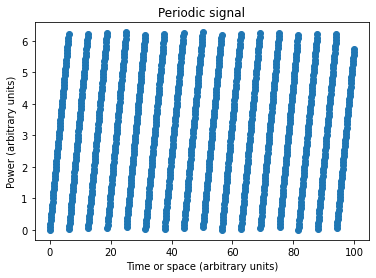

In [27]:
fig, ax = plt.subplots(1, 1)
ax.scatter(xx, periodic_signal(xx))
ax.set_title('Periodic signal')
ax.set_xlabel('Time or space (arbitrary units)')
ax.set_ylabel('Power (arbitrary units)');

In [24]:
def phase_fold(xx):
    folded = []
    for x in xx:
        n = 0
        while True:
            if (x - 2*n*np.pi) > 2*np.pi:
                n += 1
            else:
                break
        x -= 2*n*np.pi
        folded.append(x)
    return folded

In [25]:
folded = phase_fold(xx)
signal = periodic_signal(xx)

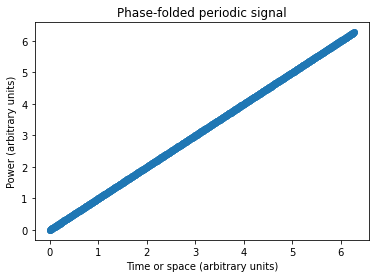

In [42]:
fig, ax = plt.subplots(1, 1)
ax.scatter(folded, signal)
ax.set_title('Phase-folded periodic signal')
ax.set_xlabel('Time or space (arbitrary units)')
ax.set_ylabel('Power (arbitrary units)');

### Part (b)

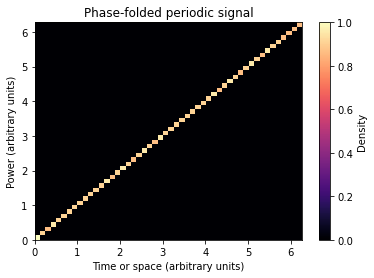

In [44]:
fig, ax = plt.subplots(1, 1)
cmap = 'magma'

ax.hist2d(folded, signal, [50, 50], cmap=cmap)
ax.set_title('Phase-folded periodic signal')
ax.set_xlabel('Time or space (arbitrary units)')
ax.set_ylabel('Power (arbitrary units)')

plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, label='Density');

These plots are a bit dull because the "data" here exactly follows an analytic function. We would see more scatter/a wider distribution if we did this with a real-life periodic signal.